In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
df = pd.read_csv("/Users/DataSci/Desktop/Flatiron/Assignments/Phase_4_Proj/apple_goog.csv", index_col = 0)

In [3]:
df.head(10)

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet
1,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...
4,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...
5,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...
7,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...
10,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...
13,2020-11-28,Chris Short,chrisshort,0,apple silicon,2,en,recommended read apple silicon developer persp...
14,2020-11-28,Ian W. Yeo,ianyeo,0,apple silicon,1,en,imagining the possibilities with apple silicon...
17,2020-11-28,fabdub,fabdub,0,apple silicon,0,en,cardhop with apple silicon native coming
18,2020-11-28,Markus Rudel,rudelm,0,apple silicon,1,en,interesting blog post on the new apple silicon...
19,2020-11-28,Ahmed Ouardani,ahmedouardani1,0,apple silicon,1,en,before you jump like crazy on new mac chip goo...


In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.shape


(678730, 8)

In [6]:
df.isnull().sum()

date               0
name              38
username           0
retweets_count     0
search_term        0
likes_count        0
language           0
c_tweet            6
dtype: int64

In [7]:
df.dropna(inplace = True)

In [8]:
df.describe()

,retweets_count,likes_count
count,678686.000000,678686.000000
mean,1.585172,11.665686
std,56.823221,351.834219
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,17446.000000,91917.000000


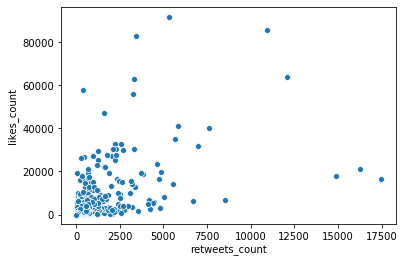

In [9]:
sns.scatterplot(x=df["retweets_count"], y=df["likes_count"]);

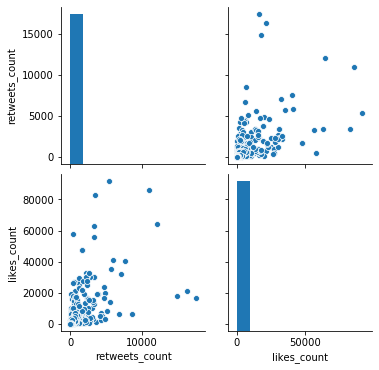

In [10]:
sns.pairplot(df);

In [11]:
x=df["search_term"].value_counts().index.to_list()

In [12]:
y = df["search_term"].value_counts().to_list()

Text(0, 0.5, 'Number of tweets found')

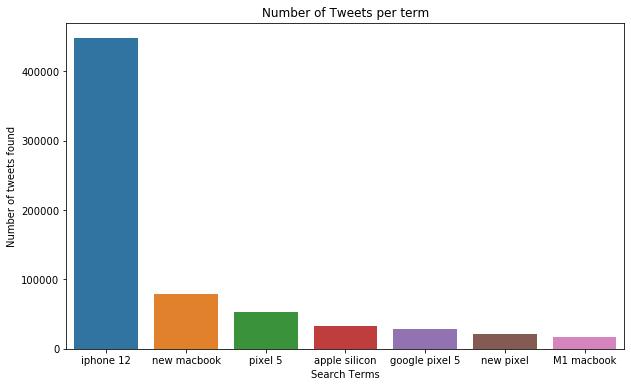

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=x, y=y)
plt.title("Number of Tweets per term")
plt.xlabel("Search Terms")
plt.ylabel("Number of tweets found")

In [14]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer  # will be on the cc
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/DataSci/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/DataSci/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/DataSci/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
df.head()

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...


In [17]:
len(df["c_tweet"])

678686

In [18]:
from nltk.tokenize import word_tokenize 

text = "Hello everyone. Welcome to GeeksforGeeks."
word_tokenize(text) 


['Hello', 'everyone', '.', 'Welcome', 'to', 'GeeksforGeeks', '.']

In [19]:
for tweet in df["c_tweet"][:10]:
    print(word_tokenize(tweet))

['borderlands', 'in', 'on', 'apple', 'silicon', 'yes', 'yes', 'it', 'playable']
['mac', 'mini', 'vs', 'mac', 'pro', 'interesting', 'review', 'of', 'pros', 'and', 'cons', 'an', 'applesilicon', 'based', 'macpro', 'is', 'going', 'to', 'be', 'monster']
['and', 'can', 'only', 'imagine', 'what', 'the', 'apple', 'silicon', 'for', 'the', 'macbook', 'pro', 'or', 'imac', 'will', 'be', 'capable', 'of']
['to', 'repeat', 'something', 'said', 'at', 'the', 'debut', 'if', 'apple', 'silicon', 'continues', 'to', 'offer', 'this', 'level', 'of', 'performance', 'and', 'the', 'hardware', 'is', 'exclusive', 'to', 'mac', 'the', 'pc', 'market', 'particularly', 'pc', 'laptops', 'is', 'in', 'for', 'some', 'very', 'hard', 'times']
['is', 'not', 'the', 'problem', 'pixel', 'size', 'is', 'the', 'problem', 'also', 'intel', 'is', 'the', 'problem', 'apple', 'can', 'put', 'tiny', 'bump', 'in', 'the', 'back', 'of', 'the', 'lid', 'to', 'fit', 'bigger', 'sensor', 'once', 'all', 'macs', 'have', 'apple', 'silicon', 'that', '

In [20]:
tokenized = []
for tweet in df["c_tweet"]:
    tokenized.append(word_tokenize(tweet))

df["tokenized"] = tokenized
    

In [21]:
df

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,tokenized
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,"[borderlands, in, on, apple, silicon, yes, yes..."
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,"[mac, mini, vs, mac, pro, interesting, review,..."
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,"[and, can, only, imagine, what, the, apple, si..."
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,"[to, repeat, something, said, at, the, debut, ..."
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,"[is, not, the, problem, pixel, size, is, the, ..."
...,...,...,...,...,...,...,...,...,...
678725,2020-09-01 00:00:00,Grégory Thiell 🧢🌿🚗⚡️,gthiell,0,iphone 12,0,en,ll upgrade my iphone pro max to iphone if they...,"[ll, upgrade, my, iphone, pro, max, to, iphone..."
678726,2020-09-01 00:00:00,ずみ@zoomishi,zoomishi,0,iphone 12,0,en,rumor airtags could launch alongside iphone in...,"[rumor, airtags, could, launch, alongside, iph..."
678727,2020-09-01 00:00:00,Joe Moreno,joemoreno,0,iphone 12,0,en,airtags iphone and apple watch series announce...,"[airtags, iphone, and, apple, watch, series, a..."
678728,2020-09-01 00:00:00,AppleInsider,appleinsider,21,iphone 12,154,en,dark blue iphone could help apple sell up to m...,"[dark, blue, iphone, could, help, apple, sell,..."


In [22]:
df["tokenized"]

0         [borderlands, in, on, apple, silicon, yes, yes...
1         [mac, mini, vs, mac, pro, interesting, review,...
2         [and, can, only, imagine, what, the, apple, si...
3         [to, repeat, something, said, at, the, debut, ...
4         [is, not, the, problem, pixel, size, is, the, ...
                                ...                        
678725    [ll, upgrade, my, iphone, pro, max, to, iphone...
678726    [rumor, airtags, could, launch, alongside, iph...
678727    [airtags, iphone, and, apple, watch, series, a...
678728    [dark, blue, iphone, could, help, apple, sell,...
678729    [if, your, money, is, unlimited, what, would, ...
Name: tokenized, Length: 678686, dtype: object

In [23]:
stop_words=list(set(stopwords.words("english")))

In [24]:
stop_words

['out',
 'isn',
 'do',
 'same',
 'i',
 'he',
 'weren',
 'an',
 'needn',
 'as',
 'been',
 'mightn',
 "didn't",
 'but',
 'me',
 'yourselves',
 'who',
 "mustn't",
 "wasn't",
 'itself',
 's',
 'ourselves',
 'will',
 'the',
 'in',
 'd',
 'hasn',
 'after',
 'all',
 'ma',
 'some',
 'your',
 'be',
 'didn',
 'can',
 "needn't",
 'just',
 'doing',
 'while',
 "shan't",
 'being',
 'down',
 'at',
 'o',
 "won't",
 'ain',
 'over',
 'between',
 'her',
 'his',
 "should've",
 've',
 'that',
 'before',
 'both',
 'why',
 'herself',
 'with',
 'those',
 'and',
 'how',
 "hasn't",
 'above',
 'very',
 'aren',
 "hadn't",
 'have',
 'these',
 "you'd",
 'they',
 'again',
 'what',
 'such',
 'mustn',
 'any',
 'each',
 'to',
 'were',
 "doesn't",
 "you'll",
 'until',
 "you've",
 "that'll",
 'shouldn',
 'not',
 'when',
 'was',
 'himself',
 'we',
 'wouldn',
 'you',
 "haven't",
 'hers',
 'doesn',
 'by',
 'further',
 'then',
 'for',
 'off',
 'ours',
 'themselves',
 'here',
 'into',
 'from',
 'myself',
 'is',
 'don',
 'am',

In [25]:
filtered_review=[]
for word in df["tokenized"]:
    if word not in stop_words:
        filtered_review.append(word)
df['filtered']=filtered_review

In [26]:
df

,date,name,username,retweets_count,search_term,likes_count,language,c_tweet,tokenized,filtered
0,2020-11-28,HyperNavJack27,jack_mangano,0,apple silicon,10,en,borderlands in on apple silicon yes yes it pla...,"[borderlands, in, on, apple, silicon, yes, yes...","[borderlands, in, on, apple, silicon, yes, yes..."
1,2020-11-28,Erik Engheim,erikengheim,0,apple silicon,1,en,mac mini vs mac pro interesting review of pros...,"[mac, mini, vs, mac, pro, interesting, review,...","[mac, mini, vs, mac, pro, interesting, review,..."
2,2020-11-28,Armando Monroy,ratzo,0,apple silicon,2,en,and can only imagine what the apple silicon fo...,"[and, can, only, imagine, what, the, apple, si...","[and, can, only, imagine, what, the, apple, si..."
3,2020-11-28,Matthew S. Smith,matt_on_tech,1,apple silicon,4,en,to repeat something said at the debut if apple...,"[to, repeat, something, said, at, the, debut, ...","[to, repeat, something, said, at, the, debut, ..."
4,2020-11-28,Danel Omen ➐ he/him.®️,heck_wtf,0,apple silicon,0,en,is not the problem pixel size is the problem a...,"[is, not, the, problem, pixel, size, is, the, ...","[is, not, the, problem, pixel, size, is, the, ..."
...,...,...,...,...,...,...,...,...,...,...
678725,2020-09-01 00:00:00,Grégory Thiell 🧢🌿🚗⚡️,gthiell,0,iphone 12,0,en,ll upgrade my iphone pro max to iphone if they...,"[ll, upgrade, my, iphone, pro, max, to, iphone...","[ll, upgrade, my, iphone, pro, max, to, iphone..."
678726,2020-09-01 00:00:00,ずみ@zoomishi,zoomishi,0,iphone 12,0,en,rumor airtags could launch alongside iphone in...,"[rumor, airtags, could, launch, alongside, iph...","[rumor, airtags, could, launch, alongside, iph..."
678727,2020-09-01 00:00:00,Joe Moreno,joemoreno,0,iphone 12,0,en,airtags iphone and apple watch series announce...,"[airtags, iphone, and, apple, watch, series, a...","[airtags, iphone, and, apple, watch, series, a..."
678728,2020-09-01 00:00:00,AppleInsider,appleinsider,21,iphone 12,154,en,dark blue iphone could help apple sell up to m...,"[dark, blue, iphone, could, help, apple, sell,...","[dark, blue, iphone, could, help, apple, sell,..."


In [29]:
df["tokenized"]=df["filtered"]

0         False
1         False
2         False
3         False
4         False
          ...  
678725    False
678726    False
678727    False
678728    False
678729    False
Length: 678686, dtype: bool

In [28]:
df.drop(columns=["language", "name", "username"], inplace=True)